### Download Data

In [ ]:
!mkdir data
!cd data

# If this link does not work, visit - https://www.kaggle.com/dansbecker/hot-dog-not-hot-dog
!wget https://www.kaggle.com/dansbecker/hot-dog-not-hot-dog/downloads/hot-dog-not-hot-dog.zip/4

### Extract Files

In [ ]:
!7z x seefood.7z

### Data Setup

In [ ]:
!cd seefood
!mv * ..
!cd ..
# Rename the test folder to valid
!mv test valid

### Create a 70-30 split

In [ ]:
# Move 100 images from each of the valid folders to the respective train folders.
!shuf -n 100 -e ./valid/hot_dog/* | xargs -i mv {} ./train/hot_dog
!shuf -n 100 -e ./valid/not_hot_dog/* | xargs -i mv {} ./train/not_hot_dog

### Let's have a look at the data

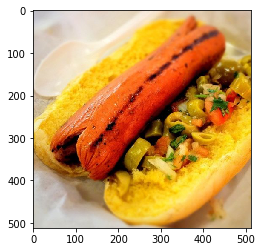

In [3]:
# This file contains all the main external libraries we will use
from fastai.imports import * 

PATH = "/home/yashu_seth/data/"

hot_dog_files = os.listdir(f'{PATH}valid/hot_dog')[:10]
img = plt.imread(f'{PATH}valid/hot_dog/{hot_dog_files[4]}')
plt.imshow(img);

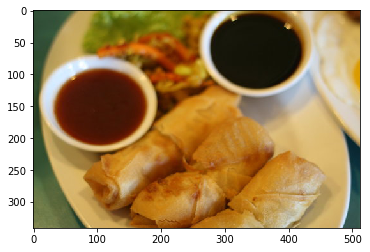

In [4]:
not_hot_dog_files = os.listdir(f'{PATH}valid/not_hot_dog/')[:10]

img = plt.imread(f'{PATH}valid/not_hot_dog/{not_hot_dog_files[6]}')
plt.imshow(img);

In [5]:
from fastai.conv_learner import *

In [36]:
tfms = tfms_from_model(resnet34, sz=224)
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(resnet34, data)

In [37]:
learn.fit(0.005, 6)

HBox(children=(IntProgress(value=0, description='Epoch', max=6), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.726549   0.372272   0.842339  
    1      0.500642   0.25229    0.914819                  
    2      0.401544   0.235235   0.911694                  
    3      0.333859   0.23114    0.905444                  
    4      0.303246   0.217755   0.911895                  
    5      0.269516   0.214936   0.921472                  



[0.21493621, 0.9214717745780945]